### This is the notebook for creating tests and performing them.

Format of the paths : p = [(x,y),...]

1st : simple, and then more complex.
Easiest : same number of points in both paths. No crossing. No going back. On segent. Same position at the beginning. Same position at the arrival.

In [10]:
# Imports

import matplotlib.pyplot as plt
import numpy as np

## TODO
#import unittest

## TODO
#from solution.ipynb import *
#import solution

ModuleNotFoundError: No module named 'solution'

In [ ]:
# Function which displays the paths

def displ(theo,expe):
    # theo is the theoretical path
    # expe is the one really performed
    plt.clf()
    plt.figure()
    plt.plot([theo[i][0] for i in range(len(theo))],[theo[i][1] for i in range(len(theo))],c='r',label = "theoretical")
    #plt.tit("theoretical")
    plt.plot([expe[i][0] for i in range(len(expe))],[expe[i][1] for i in range(len(expe))],c='g',label = "experimental")
    #plt.label("experimental")
    plt.title("Paths")
    plt.legend()
    plt.show()

In [ ]:
# Test of the function displ.

theo = [(0,0),(1,1),(1,2)]
expe = [(0,0),(1,0),(2,0)]

displ(theo,expe)

In [4]:
# Test 1 : very simple.
"""
## When the real path follows the theoretical path
theo = [(0,x) for x in range(5)]
expe = [(0,x) for x in range(5)]

# Expected : error = 0
displ(theo,expe)
""" 

def test1():
    theo = [(0,x) for x in range(5)]
    expe = [(0,x) for x in range(5)]
    
    displ(theo,expe)
    
    assertEqual(0, solution.trajectoryError(theo, expe))

NameError: name 'plt' is not defined

<Figure size 432x288 with 0 Axes>

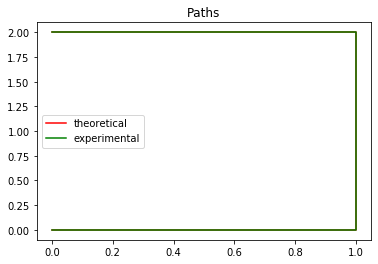

In [8]:
# Test 2 : the real path follows the theoretical path but there is a U-turn

theo = [(0,2),(1,2),(1,0),(0,0)]
expe = [(0,2),(1,2),(1,0),(0,0)]
# Difference expected : 0
displ(theo,expe)

<Figure size 432x288 with 0 Axes>

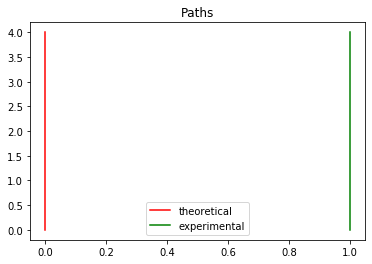

In [9]:
# Test 3 : simple path but expe doesn't follow theo

theo = [(0,x) for x in range(5)]
expe = [(1,x) for x in range(5)]
displ(theo,expe)
# Difference expected : (area = 4 )/ (length = 4) = 1

<Figure size 432x288 with 0 Axes>

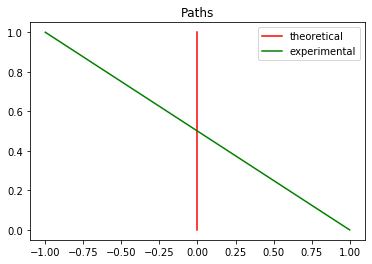

In [10]:
# Test 4 : expe crosses theo

theo = [(0,0),(0,1)]
expe = [(1,0),(-1,1)]
displ(theo,expe)

# Difference expected : 0.5

<Figure size 432x288 with 0 Axes>

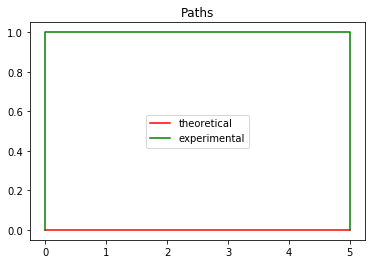

In [13]:
# Test 5 : not the same number of points but simple path.

theo = [(0,0),(5,0)]
expe = [(0,0)] + [(x,1) for x in range(6)] + [(5,0)]
displ(theo,expe)
# Difference expected : 1


<Figure size 432x288 with 0 Axes>

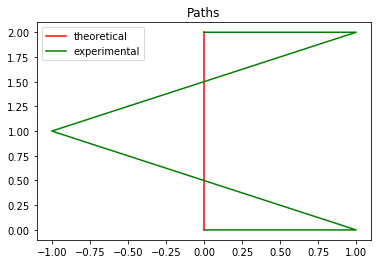

In [14]:
# Test 6 : two crosses

theo = [(0,0),(0,2)]
expe = [(0,0),(1,0),(-1,1),(1,2),(0,2)]
displ(theo,expe)

In [ ]:
# Test 7 : when starting point and 